# 라이브러리 임포트

In [9]:
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show
from skimage import color, viewer, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import random_noise
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from scipy import misc

# PIL을 사용하여 영상 읽기, 저장 및 표시

264 240 RGB None <class 'PIL.Image.Image'>


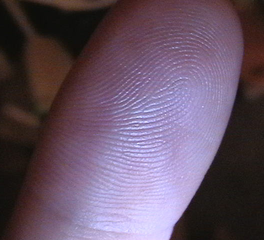

In [26]:
im = Image.open("../images/fingerprint/fingerprint.jpeg") 	# 영상 읽기, 영상 파일 경로 주의
im = im.resize((im.width//2, im.height//2), Image.ANTIALIAS) # 이미지 축소
print(im.width, im.height, im.mode, im.format, type(im))
# 453 340 RGB PNG <class 'PIL.PngImagePlugin.PngImageFile'>
#im.show() 									# 영상 표시

im

# 명암도 영상

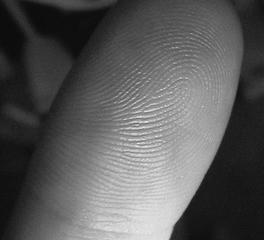

In [24]:
im = Image.open("../images/fingerprint/fingerprint.jpeg") 	# 영상 읽기, 영상 파일 경로 주의
im_g = im.convert('L') 							# 컬러 영상을 명암도 영상으로 변환
im_g.save('../images/fingerprint/fingerprint_grey.jpeg') 			# 디스크에 파일 저장
img1 = Image.open("../images/fingerprint/fingerprint_grey.jpeg") # 디스크의 파일 읽어 표시
img1.resize((im.width//2, im.height//2), Image.ANTIALIAS) # 이미지 축소

img1

# 어두운 영상 변경

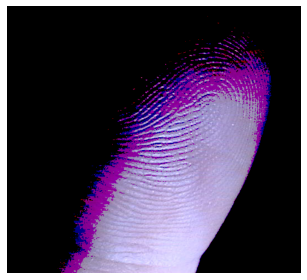

In [20]:
im = mpimg.imread("../images/fingerprint/fingerprint.png")
im1 = im
im1[im1 < 0.5] = 0 						# 어두운 영상 생성

plt.imshow(im1) 						# 영상 그리기
plt.axis('off') 						# 그래프에 축 없음
plt.tight_layout()

# HSV영상 변환

H(Hue : 색상)
색상은 0~360도로 빨강(0)을 시작으로 변하게 된다. 


S(Saturation : 채도)
채도는 색상의 진함을 뜻하며, 0% ~ 100%로 100%일 경우 색이 진함을 뜻한다.


V(Value : 명도)
명도는 밝고 어두움을 뜻하고, 검은색이 0% ~ 흰색이 100% 이다. 


HSV를 사용하는 이유는,색상값만 있는 RGB보다 채도와 명도가 같이 있는 HSV를 사용했을 때 빛의 영향에 맞춰서 색상 기준을 조절할 수 있기 때문이다. 

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(480, 528, 3) uint8 <class 'numpy.ndarray'>


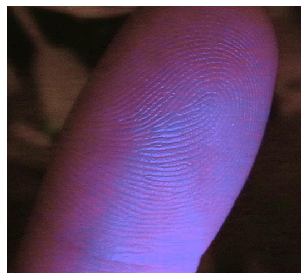

In [40]:
im = imread("../images/fingerprint/fingerprint.jpeg") 			# 영상 읽기
print(im.shape, im.dtype, type(im))
# (362, 486, 3) uint8 <class 'numpy.ndarray'>
hsv = color.rgb2hsv(im) 						# 컬러 공간 변환 (RGB --> HSV)
hsv[:, :, 1] = 0.5 								# 채도 채널 값 변경
im1 = color.hsv2rgb(hsv) 						# 컬러 공간 환원(HSV --> RGB)

imsave('../images/fingerprint/fingerprint_hsv.jpeg', im1) 		# 영상 저장
im = imread("../images/fingerprint/fingerprint_hsv.jpeg")
plt.axis('off'), imshow(im)
show()

# 영상 반전

point()함수를 사용하여 단이 인수 함수로 각 화소 값을 변환할 수 있다.
이를 사용하여 영상을 반전시킬 수 있다.  

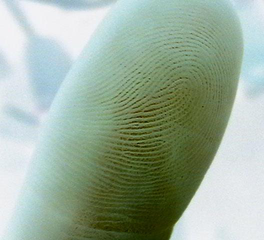

In [47]:
im = Image.open("../images/fingerprint/fingerprint.jpeg")
im_t = im.point(lambda x: 255 - x)
im_t.save('../images/fingerprint/fingerprint_lamda.jpeg')

img4 = Image.open("../images/fingerprint/fingerprint_lamda.jpeg")
img5 = img4.resize((im.width//2, im.height//2), Image.ANTIALIAS) # 이미지 축소
img5

# 영상의 화소 값 변경 - 소금 후추 잡음 추가

putpixel() 함수를 사용하여 영상의 화소 값을 변경하여 소금 후추 잡음을 추가할 수 있다.

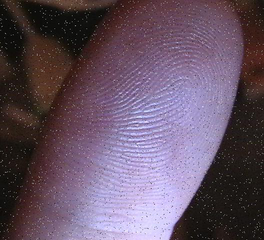

In [50]:
im = Image.open("../images/fingerprint/fingerprint.jpeg")
im1 = im.copy()  					# 복제를 통해 원본 영상 유지
n = 5000  							# 영상내에 5,000개 랜덤 좌표 선택
x = np.random.randint(0, im.width, n)
y = np.random.randint(0, im.height,n)

for (x,y) in zip(x,y):
    new_pix = (0,0,0) if np.random.rand() < 0.5 else (255,255,255)
    im1.putpixel((x, y), new_pix )	# 소금 후추 잡음 추가
im1.save('../images/fingerprint/fingerprint_putpixel.jpeg')

img12 = Image.open("../images/fingerprint/fingerprint_putpixel.jpeg")
img12.resize((im.width//2, im.height//2), Image.ANTIALIAS) # 이미지 축소

# RGB 채널 분리

split() 함수를 사용하여 RGB 영상에 대한 다음 코드 블록과 같이 다중 채널 영상의 채널을 분리할 수 있다.

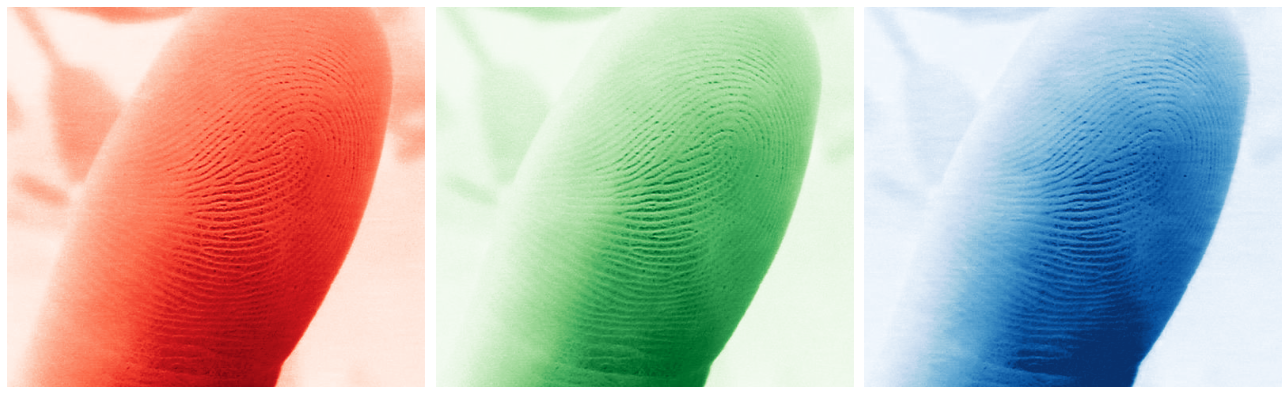

In [52]:
im = Image.open("../images/fingerprint/fingerprint.jpeg")
ch_r, ch_g, ch_b = im.split()	# 3개 채널(Red, Green, Blue) 분리
# matplotlib를 사용하여 각 채널 영상 표시
plt.figure(figsize=(18,6))
plt.subplot(1,3,1), plt.imshow(ch_r, cmap='Reds'), plt.axis('off')
plt.subplot(1,3,2), plt.imshow(ch_g, cmap='Greens'), plt.axis('off')
plt.subplot(1,3,3), plt.imshow(ch_b, cmap='Blues'), plt.axis('off')
plt.tight_layout()
plt.show()

# swirl 변환 적용

swirl() 함수를 사용하여 변형을 구현하는 방법이다.
- strenth는 swirl 크기에 대한 함수
- radius는 swirl 범위
- rotation은 회전각도

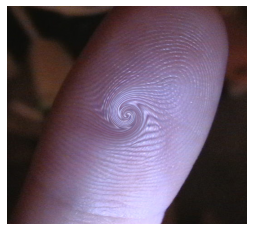

In [63]:
im = imread("../images/fingerprint/fingerprint.jpeg")
swirled = swirl(im, rotation=0, strength=10, radius=150)
plt.imshow(swirled)
plt.axis('off')
plt.show()

# 영상에 램덤 가우시안 잡음 추가

random_noise() 함수를 사용하여 영상에 잡음을 추가할 수 있다.

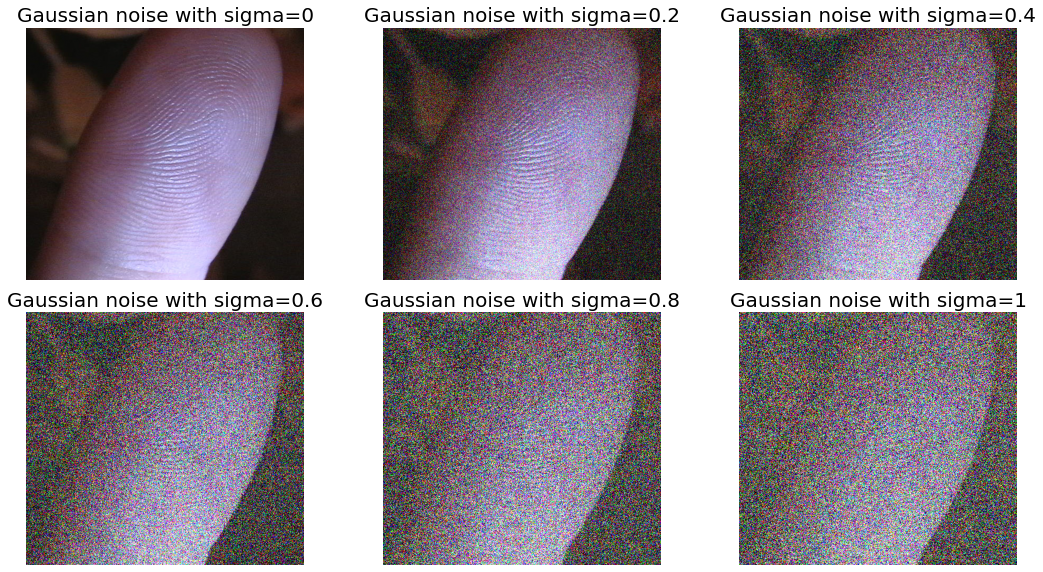

In [70]:
im = img_as_float(imread("../images/fingerprint/fingerprint.jpeg"))
sigmas = [0, 0.2, 0.4, 0.6, 0.8, 1]

plt.figure(figsize=(15,12))
for i in range(6):
    noisy = random_noise(im, var=sigmas[i]**2)
    plt.subplot(3,3,i+1), plt.imshow(noisy), plt.axis('off')
    plt.title('Gaussian noise with sigma=' + str(sigmas[i]), size=20)
    plt.tight_layout()
    
plt.show()

# Matplotlib로 영상 조작 - 영상의 윤곽선 그리기

matplotlib 라이브러리의 pylab 모듈을 사용하여 윤관선 그리기를 할 수 있다.

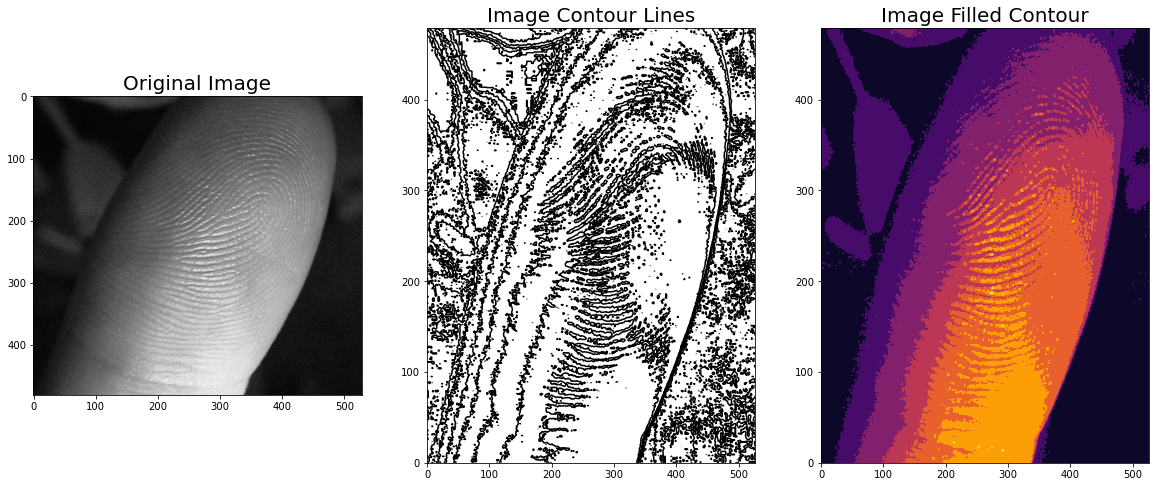

In [85]:
im = color.rgb2gray(imread("../images/fingerprint/fingerprint.jpeg"))

plt.figure(figsize=(20,8))
plt.subplot(131), plt.imshow(im, cmap='gray'), plt.title('Original Image', size=20)
plt.subplot(132),
plt.contour(np.flipud(im), colors='k', levels=np.logspace(-5, 10, 100))
plt.title('Image Contour Lines', size=20)
plt.subplot(133), plt.title('Image Filled Contour', size=20),
plt.contourf(np.flipud(im), cmap='inferno')
plt.show()